In [37]:
# 統計量

# 標本の観測値をもとに、確率分布の未知のパラメータを推測することを「統計的推定」という
# 特に、標本のある関数を用いてパラメータを推定することを「点推定」という
# また、関数の出力を「推定量」とよび、観測値を代入した結果を「推定値」とよぶ
# また、未知のパラメータの値によらない標本のみの関数を「統計量」という

import pandas as pd
from sklearn.datasets import load_iris

# pandasのdescribeを使うと基本統計量の一覧表が取得できる
iris = load_iris()
iris_df = pd.DataFrame(
        iris.data,
        columns=iris.feature_names,
    )
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


推定パラメータ:(-0.014556635615470447, 0.9379577571961389)


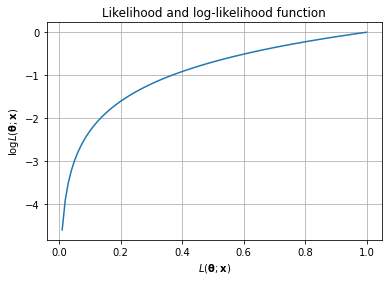

In [38]:
# 各種推定法

# 標準的なパラメータの点推定法として「最尤法」があげられる
# 「尤度関数」とそれから算出される「尤度」を最大化するパラメータを推定量として用いる
# このときの推定量を「最尤推定量」とよぶ
# 尤度は対数をとると計算しやすくなることが多く、対数をとった尤度を「対数尤度」とよぶ
# なお、尤度は得られた標本が確率分布によってどれだけ生成されやすいかの指標と解釈できる


# 正規分布から乱数を生成しパラメータを推定
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(seed=10)
norm_values = np.random.normal(0, 1, size=1000) # N(0,1)に従う乱数を生成
fit_parameter = norm.fit(norm_values)
print(f"推定パラメータ:{fit_parameter}") # N(0,1)に近いパラメータ


# 尤度関数と対数尤度関数の関係を描画
x = np.linspace(0.01, 1, 100)
y = np.log(x)
plt.plot(x, y)

plt.grid()
plt.title("Likelihood and log-likelihood function")
plt.xlabel(r"$L(\mathbf{\theta};\mathbf{x})$")
plt.ylabel(r"$\log L(\mathbf{\theta};\mathbf{x})$")

plt.show()

In [39]:
# 最尤法は尤度の最大化計算が困難であることが多く、そういった場合は「モーメント法」も用いられる

# また、真のパラメータと推定量パラメータの差異を直接的に評価する標準的な指標として「平均二乗誤差(MSE)」がある

In [40]:
# 点推定の性質

# 真のパラメータ値Θがどのような性質であったとしても、E[θ']=Θとなるような推定量Θ'を「不偏推定量」とよぶ
# b(Θ') = E[θ']-Θを推定量θ'の「バイアス」とよぶので、不偏推定量は常にバイアスが0の推定量といえる
# 一方で、平均二乗誤差(E[(θ'-Θ)**2])は、一般の確率変数に対してE[X**2]=E[X]**2+V[X]が成立することから、
# 以下のようなバイアスの二乗の項とバリアンスの項にわけることができる
# E[(θ'-Θ)**2] = (E[θ']-Θ)**2 + V[θ'] = b(Θ')**2 + V[θ']
# これを平均二乗誤差の「バイアス・バリアンス分解」とよぶ

# 標準正規分布に従う乱数を生成
from sklearn.metrics import mean_squared_error

norm_values = np.random.normal(0, 1, size=1000)
e_theta = 0
e_theta_hat = np.mean(norm_values)
v_theta_hat = np.var(norm_values)

bias = e_theta_hat - e_theta

# バイアス・バリアンス分解を確認
e_theta_vals = np.zeros(1000, int)
mse_val = mean_squared_error(e_theta_vals, norm_values)

right_val = bias**2 + v_theta_hat
print(f"左辺の値:{mse_val}, 右辺の値:{right_val}") # 値が一致した

左辺の値:0.9896985319420827, 右辺の値:0.9896985319420827


In [41]:
# 線形回帰モデルに関して未知の線形パラメータを推定する場合の推定量を線形推定量とよぶ
# そして、任意の不偏かつ線形推定量の中では分散が最小になるということができる。(「ガウス・マルコフの定理」)
# このときの推定量は、不偏推定量の中で一様最小分散であるため、「最良線形不偏推定量(BLUE)」ともよばれる

In [42]:
# 「クラーメル・ラオの不等式」を用いると、一様最小分散不偏推定量であるかどうかの判定ができることがある
# 式は以下であらわされる
# V[Θ'] >= フィッシャー情報量の逆数(>0) -> 不偏推定量の分散の下限
# 上記の等号を満たすような不偏推定量を「有効推定量」という
# なお、フィッシャー情報量は「推定量」の良し悪しの指標。分散が小さい不偏推定量を良しとする

In [43]:
# 最尤法に必要な標本の情報を集約するためには、「十分統計量」が有効である
# 以下の式を満たす統計量T=T(X)をΘの十分統計量とよぶ
# P(X=x|T(X)=t,Θ) = P(X=x|T(X)=t)
# 要するに、T(X)で条件づけたXの分布がパラメータΘによらないことが十分統計量の定義である

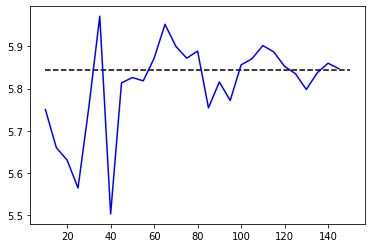

In [44]:
# 漸近的な性質

# 標本サイズが十分に大きいときの推定の妥当性を評価するための理論を漸近論という
# 確率分布FΘに独立同一に従う標本をもとに得られる推定量Θ'について、真のパラメータΘに確率収束するとき、
# つまり、任意のε>0に対して lim P(|Θ'-Θ|<ε)=1 が成立するとき、その推定量が「一致性」をもつという


sepal_length_array = np.array(iris_df['sepal length (cm)'])
 
# 母集団の平均値
mu = np.mean(sepal_length_array)
 
# 標本の数を増やしながら平均を算出
start = 10
end = len(sepal_length_array)
X = np.arange(start, end, 5)
Y = []
 
for n in range(start, end, 5):
    sample = np.random.choice(sepal_length_array, n, replace=False)
    x_bar = np.mean(sample)
    Y.append(x_bar)
 
# 母平均をプロット
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hlines(mu, start, end, "black", linestyles='dashed')
 
# 標本平均をプロット
ax.plot(X, Y, color='blue') # 母平均の値に収束していくことがわかる
plt.show()

In [58]:
# リサンプリング法

# 推定量が不偏ではなくバイアスがある場合、得られている標本を再利用して
# 推定量のバイアスを補正する方法がジャックナイフ法である
# ジャックナイフ法のように、得られている標本からの部分標本を用いることにより
# 推定精度を向上させる手法を「リサンプリング法」という

def JackKnife( input_data , func = lambda arg:arg , bin_size = 1 ):

    Ntot , Nvar = input_data.shape
    N = bin_size
    Nbin = int( Ntot / bin_size ) # ビンサイズの指定

    print( "total:" , Ntot , " / vars:" , Nvar )
    print( "bin size:" , N , " / num. of bins:" , Nbin )
    if( Ntot != Nbin * N ):
        print( "Ntot != Nbin * bin_size. Some data will not be used!" )
    Ntot = Nbin * N
        
    sum_all = np.sum( input_data[:Ntot] , axis=0 )
    # 各ジャックナイフサンプルで計算
    bin_ans = [ func( ( sum_all-np.sum( input_data[c*N:(c+1)*N] , axis=0 ) )/( Ntot-N ) ) for c in range(Nbin) ]
    # 期待値を計算
    ave = np.mean( bin_ans , axis=0 )
    # 誤差を計算
    err = np.sqrt( np.mean( np.square(bin_ans-ave) , axis=0 ) * (Nbin-1.) )
    return ave , err

input_data = iris_df.iloc[0:120,:].to_numpy() # 120行目までのデータを使用

average , error = JackKnife(input_data)
print(f"ジャックナイフ推定量:{average}")
print(f"ジャックナイフ誤差:{error}")

print(f"元の期待値:{iris_df.describe().loc['mean'].to_numpy()}")

total: 120  / vars: 4
bin size: 1  / num. of bins: 120
ジャックナイフ推定量:[5.6525     3.06916667 3.32666667 0.99583333]
ジャックナイフ誤差:[0.07036283 0.04271585 0.1556397  0.06453232]
元の期待値:[5.84333333 3.05733333 3.758      1.19933333]
